In [1]:
#%pip install yfinance

In [293]:
import requests
import numpy as np
import pandas as pd
import yfinance as yf
import random
from gym import Env
from gym.spaces import Discrete, Box
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env

In [2]:
def getTickerData(ticker, period, interval):
    hist = yf.download(tickers = ticker, period=period, interval=interval)
    df = pd.DataFrame(hist)
    df = df.reset_index()
    return df

In [3]:
df = getTickerData('btc-usd', 'max', '1d')
df = df.drop(columns={'Volume', 'Adj Close', 'Open', 'High', 'Low'})
df = df.rename(columns={'Close': 'close', 'Date': 'date'})
df['date'] = pd.to_datetime(df['date'])
df

[*********************100%***********************]  1 of 1 completed


,date,close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3140,2023-04-23,27591.384766
3141,2023-04-24,27525.339844
3142,2023-04-25,28307.597656
3143,2023-04-26,28422.701172


In [4]:
rn = random.randint(0, df.value_counts().sum())
i=0
df.shape[0] - rn

3096

366.92401123046875


,date,close
49,2014-11-05,339.485992
50,2014-11-06,349.290009
51,2014-11-07,342.415009
52,2014-11-08,345.488007
53,2014-11-09,363.264008


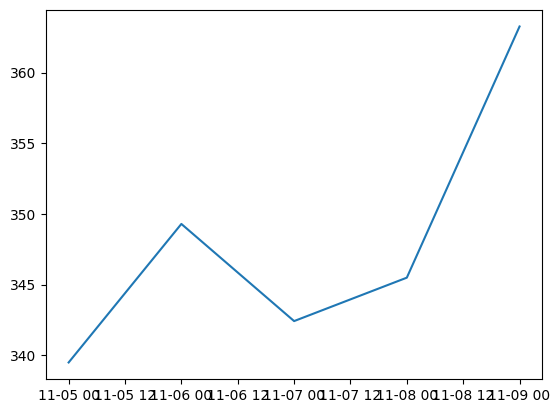

In [5]:
df2 = df.iloc[rn+i:rn+5+i,:]
final_value = df.iloc[rn+5+i]['close']
close_value = df.iloc[rn+4+i]['close']
plt.plot(df2['date'], df2['close'])
print(final_value)
i+=1
df2

In [312]:
class TradingEnv(Env):
    def __init__(self, df, n_steps, window_size) -> None:
        super().__init__()
        self.df = df.drop(columns={'date'})
        self.window_size = window_size
        self.observation_space = Box(low=-np.inf, high=np.inf, shape=(window_size, self.df.shape[1]), dtype=np.float64)
        self.action_space = Discrete(2)
        self.done = None
        
        self.current_step = 0
        self.n_steps = n_steps
        self.random_index = random.randint(0, df.value_counts().sum())
        
        self.final_value = df.iloc[self.random_index+self.window_size+self.current_step]['close']
        self.next_value = df.iloc[self.random_index+self.window_size+self.current_step+1]['close']
        
        self.long_pos = []
        self.short_pos = []
        
    def step(self, action):
        if action == 0:
            self.short_pos.append(1)
            self.long_pos.append(0)
            if self.next_value < self.final_value:
                reward = 10
            else:
                reward = -100
        else:
            self.short_pos.append(0)
            self.long_pos.append(1)
            if self.next_value > self.final_value:
                reward = 10
            else:
                reward = -100
        
        self.final_value = df.iloc[self.random_index+self.window_size+self.current_step]['close']
        self.next_value = df.iloc[self.random_index+self.window_size+self.current_step+1]['close']
        self.current_step += 1
        
        if self.current_step > self.n_steps:
            done = True
        else:
            done = False
        
        observation = self.get_observation()
        info = {}
        
        return observation, reward, done, info
        
    def reset(self):
        self.random_index = random.randint(0, df.value_counts().sum())
        self.done = False
        self.current_step = 0
        return self.get_observation(is_random=True)
    
    def get_observation(self, is_random=False):
        needed_space = self.window_size + self.n_steps*2
        if is_random:
            self.random_index = random.randint(0, df.value_counts().sum())
            if df.shape[0] - self.random_index < needed_space:
                self.random_index = df.shape[0] - needed_space
        return self.df.iloc[self.random_index+self.current_step:self.random_index+self.window_size+self.current_step, :].values
    
    def calculate_reward():
        pass    

    def close():
        pass
    
    def render():
        pass
    
    def render_final():
        pass

In [313]:
env = TradingEnv(df, window_size=90, n_steps=20)

In [315]:
check_env(env)

c:\Users\damem\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\env_checker.py:213: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


23522.87109375
23147.353515625


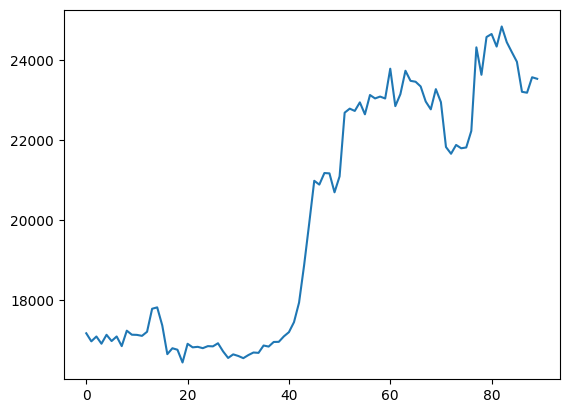

In [316]:
#env.reset()
obs, reward, done, info = env.step(0)
plt.plot(obs)
print(env.final_value)
print(env.next_value)

In [289]:
print(env.final_value)
print(env.next_value)

414.8160095214844
416.72900390625


In [288]:
env.get_observation()

array([[434.33401489],
       [433.43798828],
       [430.01098633],
       [433.09100342],
       [431.95999146],
       [429.10501099],
       [458.04800415],
       [453.23001099],
       [447.61099243],
       [447.99099731],
       [448.42800903],
       [435.69000244],
       [432.3710022 ],
       [430.30599976],
       [364.33099365],
       [387.53601074],
       [382.29901123],
       [387.16799927],
       [380.14898682],
       [420.23001099],
       [410.26199341],
       [382.49200439],
       [387.49099731],
       [402.9710083 ],
       [391.72601318],
       [392.15301514],
       [394.97198486],
       [380.28900146],
       [379.47399902],
       [378.25500488],
       [368.76699829],
       [373.05599976],
       [374.44799805],
       [369.94900513],
       [389.59399414],
       [386.54901123],
       [376.52200317],
       [376.61999512],
       [373.44699097],
       [376.0289917 ],
       [381.64898682],
       [379.6539917 ],
       [384.26300049],
       [391

In [292]:
episodes = 10
for n in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0
    while not done:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        score += reward
    print(f'episode - {n} || score - {score}')
    

episode - 1 || score - -1000
episode - 2 || score - -1110
episode - 3 || score - -670
episode - 4 || score - -1330
episode - 5 || score - -1110
episode - 6 || score - -1000
episode - 7 || score - -890
episode - 8 || score - -1000
episode - 9 || score - -1000
episode - 10 || score - -230


In [278]:
env.get_observation()

array([[23078.72851562],
       [23031.08984375],
       [23774.56640625],
       [22840.13867188],
       [23139.28320312],
       [23723.76953125],
       [23471.87109375],
       [23449.32226562],
       [23331.84765625],
       [22955.66601562],
       [22760.109375  ],
       [23264.29101562],
       [22939.3984375 ],
       [21819.0390625 ],
       [21651.18359375],
       [21870.875     ],
       [21788.203125  ],
       [21808.1015625 ],
       [22220.8046875 ],
       [24307.84179688],
       [23623.47460938],
       [24565.6015625 ],
       [24641.27734375],
       [24327.64257812],
       [24829.1484375 ],
       [24436.35351562],
       [24188.84375   ],
       [23947.4921875 ],
       [23198.12695312],
       [23175.375     ],
       [23561.21289062],
       [23522.87109375],
       [23147.35351562],
       [23646.55078125],
       [23475.46679688],
       [22362.6796875 ],
       [22353.34960938],
       [22435.51367188],
       [22429.7578125 ],
       [22219.76953125],
